# Netflix Movie and TV Show 📊 
Performing Exploratory Data Analytics to understand the dataset and make possible prediction.

**Tasks**
* Understand the Dataset, types and missing values
* Clean the dataset and handle the missing  values
* Perform Data Visualization
* Create Final Summary report.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


So, most of the dataset is based on string dtype.

Also, `director`,`country`,`date_added`,`cast` and `rating` have missing value.

**Let's check out how much missing values are there in each column**

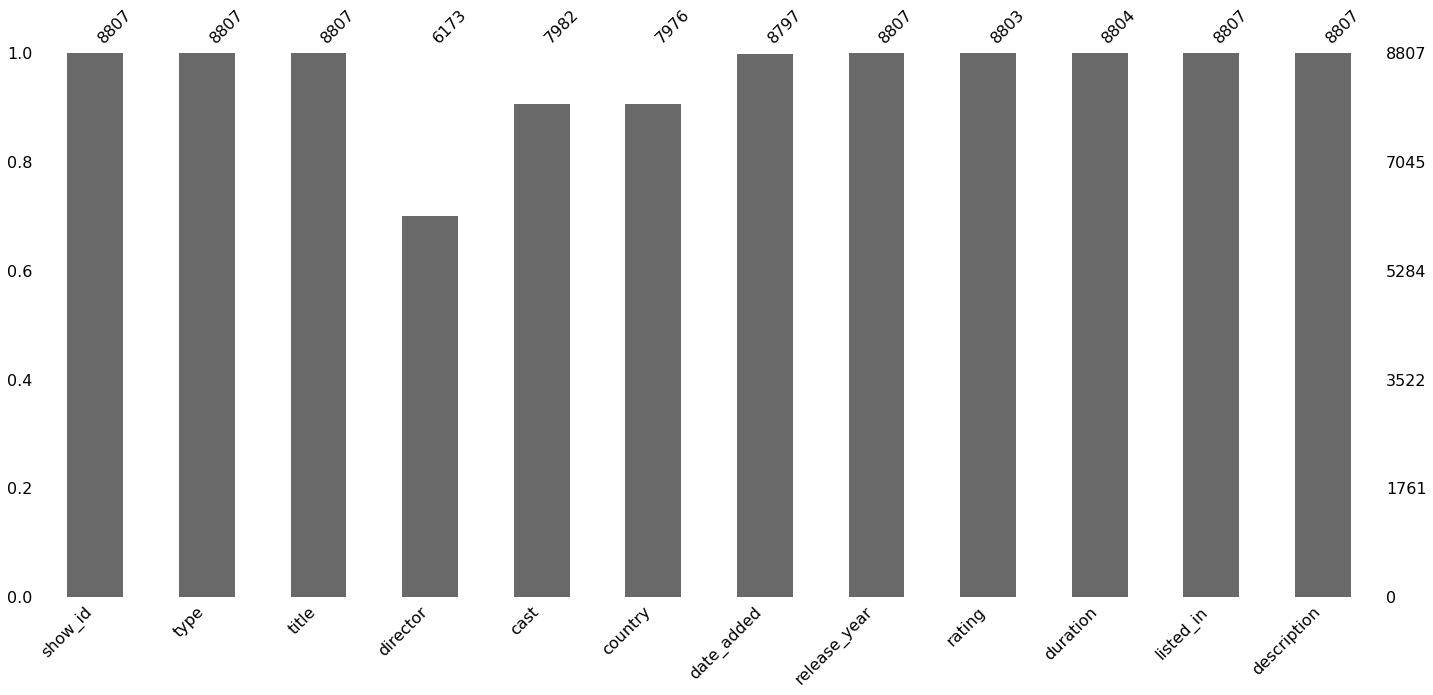

In [6]:
missingno.bar(df);

As we can see that `director` column have the maximum missing values and `date_added` have few.

So, we have to drop `date_added` as we cannot handel those value as it belongs to date(But we can Google about the date which that is added on Netflix).

### Handle Missing Value

In [7]:
df = df[df['date_added'].notna()]
# df.dropna(subset=['date_added'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


So, now we are left with 8797 values after droping missing value from `date_added ` column.

For `director` and `cast` column we can replace the missing values with `missing`.

In [9]:
df.director.fillna('missing', inplace = True)
# df.loc[df['director'].isnull(), 'director'] = 'missing'

In [10]:
df.cast.fillna('missing', inplace = True)

Also the `date_added` column is object type. So, we have to convert that.

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format = "%B %d, %Y")

We, now create a dictonary which stores the unique `cast` value as `key` and the number of times it come in the dataset as `value`. This will help while performing EDA

In [12]:
data_cast = []
data_cast = df['cast'].str.split(',', expand = True).melt()
data_cast = data_cast[data_cast['value'].notna()]
data_cast = list(data_cast['value'])

# Another way

# data_cast = []
# for i in range(len(df)):
#     data_cast.extend(df.cast.iloc[i].split(','))

In [13]:
cast_dict = {}
for i in data_cast:
    cast_dict[i] = data_cast.count(i)
len(cast_dict)    

39261

In [14]:
cast_dict = sorted(cast_dict.items(), key = lambda item: item[1], reverse = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


Now working on `country` and `rating` columns missing values and fill them with `missing` keyword.

In [16]:
df.country.fillna('missing', inplace = True)
df.rating.fillna('missing', inplace = True)

### Now extracting information from the dataset

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**What we can extract**
* split the `date_added` into month, date and year.
* split the `listed_in` diffrent category.

In [18]:
df['added_month'] = df['date_added'].dt.month.fillna(0)
df['added_date'] = df['date_added'].dt.day.fillna(0)
df['added_year'] = df['date_added'].dt.year.fillna(0)

In [69]:
# This is the oldest TvShow on Netflix
df[df['added_year'] == 1925]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_date,added_year,Cast Count


Since we extracted `date_added` column, then let's drop the column

In [19]:
df.drop('date_added', axis = 1, inplace = True)

In [20]:
listed_in = []
listed_in = df['listed_in'].str.split(',', expand = True).melt()
listed_in = listed_in[listed_in['value'].notna()]
listed_in = list(listed_in['value'])

# Another way

# for i in range(len(df)):
#     listed_in.extend(df.listed_in.iloc[i].split(','))

In [21]:
listed_dict = {}
for i in listed_in:
    listed_dict[i] = listed_in.count(i)

In [22]:
listed_dict = sorted(listed_dict.items(), key = lambda item: item[1], reverse = True)

In [23]:
listed_dict = dict(listed_dict)

In [24]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        3
listed_in       0
description     0
added_month     0
added_date      0
added_year      0
dtype: int64

In [25]:
df.dropna(inplace = True)

# EDA

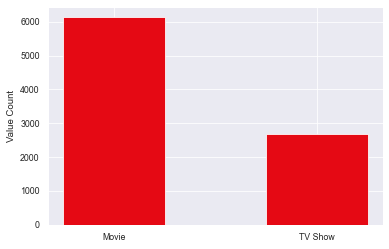

In [26]:
sns.set_theme('paper', style='darkgrid')
plt.bar(df.type.unique(), df.type.value_counts(), width=0.5, color = '#E50914')
plt.ylabel('Value Count');

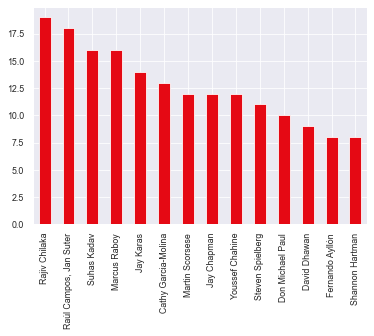

In [27]:
df.director.value_counts()[1:15].sort_values(ascending = False).plot(kind = 'bar',width=0.5, color='#E50914');

`Rajiv Chilaka`, `Raul Campos`, `Jan Suter` are most common directors.

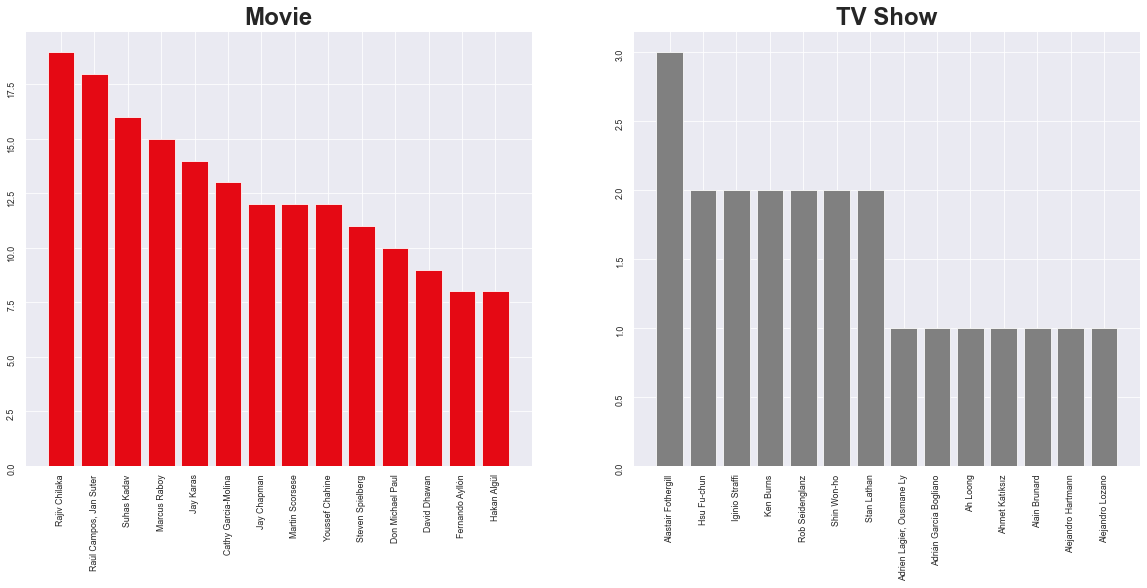

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
data = df.groupby('type')['director'].value_counts()['Movie'][1:15].to_frame()
data2 = df.groupby('type')['director'].value_counts()['TV Show'][1:15].to_frame()
# plot1
ax1.bar(data.index, data.director,color='#E50914')
ax1.tick_params(labelrotation = 90)
ax1.set_title('Movie', fontsize = 24, fontweight = 'bold')
# plot2
ax2.bar(data2.index, data2.director, color = 'grey')
ax2.tick_params(labelrotation = 90)
ax2.set_title('TV Show', fontsize = 24, fontweight = 'bold');

`Rajiv Chilaka`, `Raul Campos` directs most movies that are uploaded on NETFLIX.
`Alastair Fothergill` directs most TV Show that are uploaded on NETFLIX.

In [29]:
cast_dict = dict(cast_dict[1:])

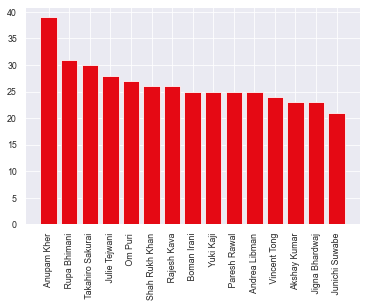

In [30]:
cast_dict_key = list(cast_dict.keys())
cast_dict_value = list(cast_dict.values())
plt.bar(cast_dict_key[:15], cast_dict_value[:15], color = '#E50914')
plt.xticks(rotation='vertical');

`Anupam Kher` is the most common cast that is found over the NETFLIX.

In [31]:
country_list = []
country_list = df['country'].str.split(',',expand = True).melt()
country_list = country_list[country_list['value'].notna()]
country_list = list(country_list['value'])

In [32]:
country_dict = {}
for i in country_list:
    country_dict[i] = country_list.count(i)

In [33]:
country_dict = sorted(country_dict.items(), key = lambda item: item[1], reverse = True)

In [34]:
country_dict = dict(country_dict)

In [35]:
del country_dict['missing']

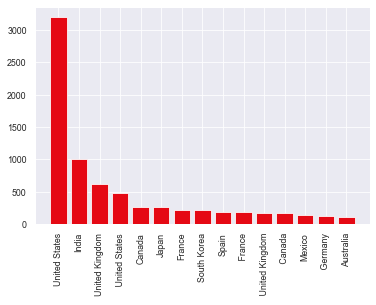

In [36]:
plt.bar(list(country_dict.keys())[:15],list(country_dict.values())[:15], color='#E50914')
plt.xticks(rotation='vertical');

Most Movies and TV shows are from `United States`

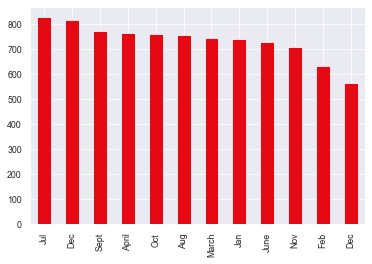

In [37]:
df.added_month.value_counts().sort_values(ascending = False).plot(kind = 'bar',width=0.5, color='#E50914');
plt.xticks(rotation='90');
x = ['Jul', 'Dec', 'Sept', 'April', 'Oct', 'Aug', 'March', 'Jan', 'June','Nov', 'Feb', 'Dec']
values = range(len(x))
plt.xticks(values,x);

So, Netflix added most shows in month of `July`.

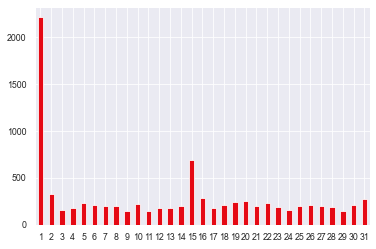

In [38]:
df.added_date.value_counts().sort_index().plot(kind = 'bar',width=0.5, color='#E50914');
plt.xticks(rotation='0');

Also. Netflix like to add Shows and Movies in the beginning of the month and in the middle.

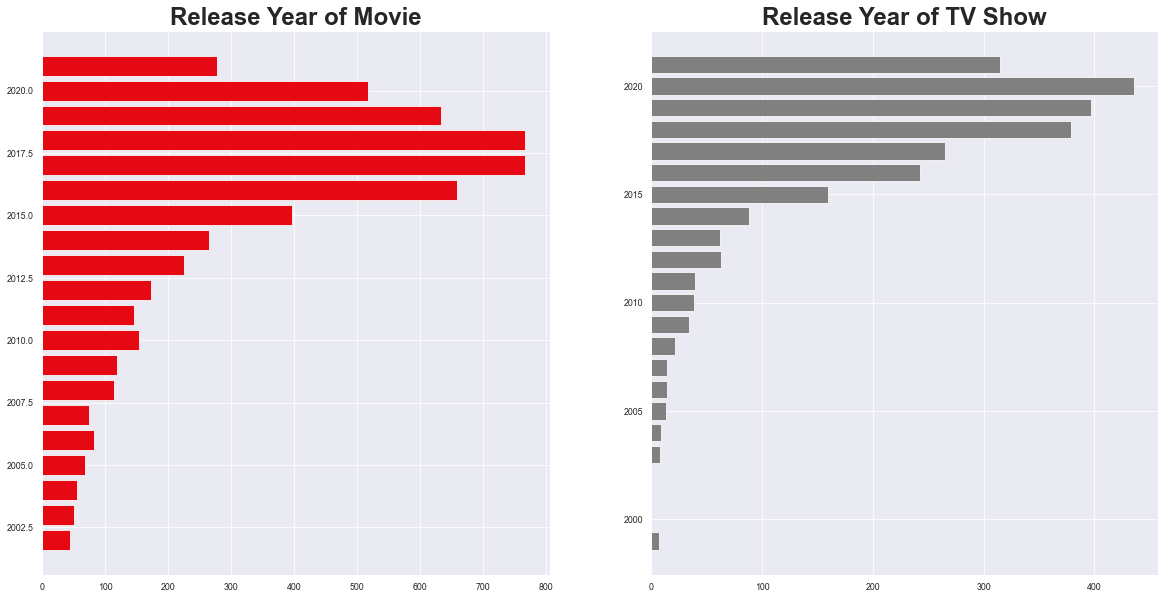

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
df_movie = df.groupby('type')['release_year'].value_counts()['Movie'].sort_values(ascending = False)[:20].to_frame()
df_tv = df.groupby('type')['release_year'].value_counts()['TV Show'].sort_values(ascending = False)[:20].to_frame()
# plot1
ax1.barh(df_movie.index, df_movie.release_year, color='#E50914')
ax1.set_title('Release Year of Movie', fontsize = 24, fontweight = 'bold')
# plot2
ax2.barh(df_tv.index, df_tv.release_year, color = 'grey')
ax2.set_title('Release Year of TV Show', fontsize = 24, fontweight = 'bold');

This shows that in year 2020, TV Show popularity increases over the Movie on Netflix

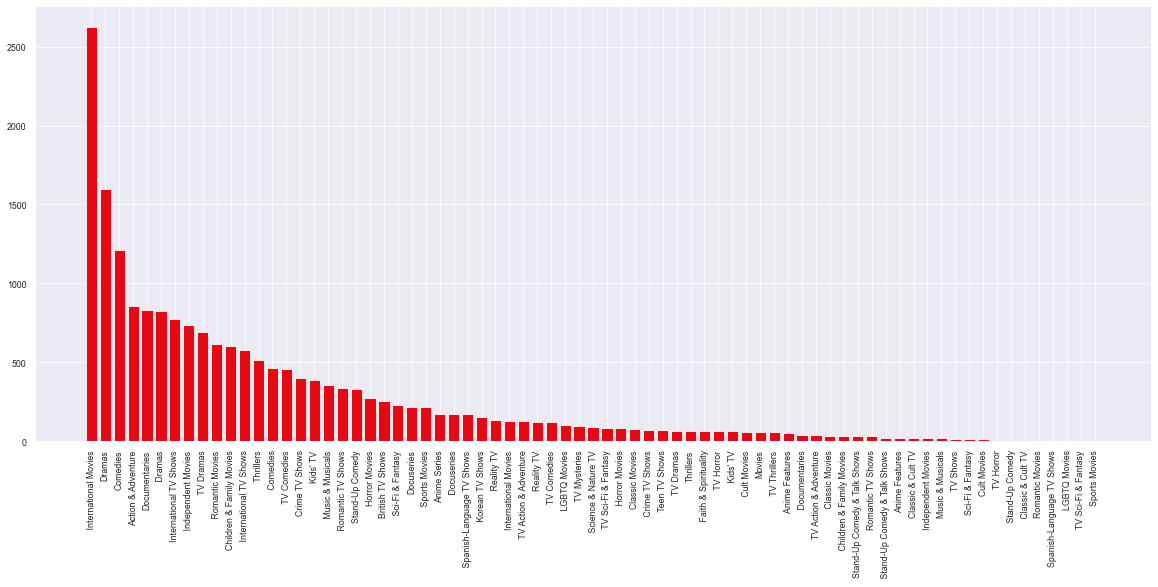

In [40]:
plt.figure(figsize=(20,8))
plt.bar(listed_dict.keys(),listed_dict.values(), color = '#E50914')
plt.xticks(rotation='90');

Most Movies with the tag `International Movies` were found over Netflix.
So, making Show or Movie famous you must have International Movie tag over your show.

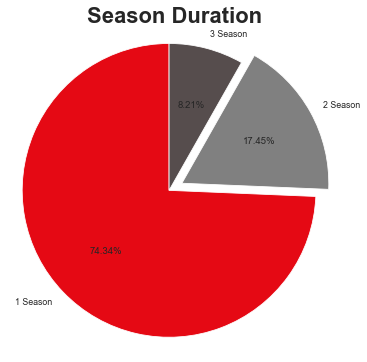

In [41]:
plt.figure(figsize=(6,6))
labels = ['1 Season', '2 Season', '3 Season']
plt.pie(df.duration.value_counts()[:3], labels = labels, autopct='%1.2f%%', startangle = 90, explode=(0.0,0.1,0.0), colors = ['#E50914','grey','#564d4d'])
plt.axis('equal')
plt.title('Season Duration', fontsize = 22, fontweight = 'bold');

Most TV Shows have 1 Season

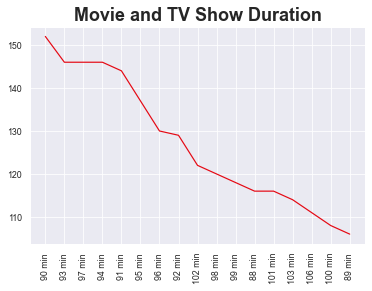

In [42]:
plt.plot(df.duration.value_counts().index.to_list()[3:20], df.duration.value_counts()[3:20], color='#E50914')
plt.xticks(rotation='90')
plt.title('Movie and TV Show Duration', fontsize=18, fontweight='bold');

Most of the Movies are of duration 90 min found over Netflix.

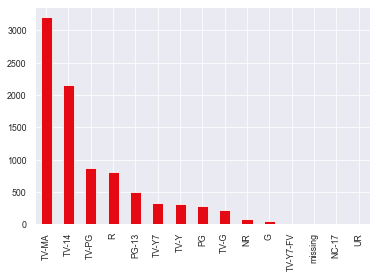

In [43]:
df['rating'].value_counts().plot(kind = 'bar',width=0.5, color='#E50914');

So, `TV-MA` is the most common rating over the Netflix.

**Commonly how many cast is there in Movie/TV Show**

In [44]:
df['Cast Count'] = df['cast'].str.split(',')
df = df[df['Cast Count'].notna()]
df['Cast Count'] = df['Cast Count'].apply(lambda x: len(x))

In [62]:
fig = px.histogram(df, 'Cast Count', nbins=40)
fig.update_layout(bargap=0.2)

From the above graph we can conclude that, usually there are either `1` or `8-12` cast are present.

### Summary

So, far we had perform lots of operations over the dataset to dig ou some very useful information from it. In some of the cases we have to create new data from the dataset to help out understanding the data more clearly.
If, we have to conclude the dataset in few line, than we can say that:

+ Oldest show on NETFLIX is `Pioneers: First Women Filmmakers`
+ `Rajiv Chilaka` is the most common director on NETFLIX.
+ `Alastair Fothergill` directs most TV Show that are uploaded on NETFLIX.
+ `Anupam Kher` is the most common cast that is found over the NETFLIX.
+ Most Movies and TV shows are from `United States`.
+ Netflix adds most shows in month of `July`.
+ Netflix like to add Shows and Movies in the beginning of the month and in the middle
+ From year 2020, most people liked to watched TV Shows over the Movies.
+ Most TV Shows have 1 Season only and most of the Movies are of duration of 90 mins.
+ Usually there are either `1` or `8-12` cast are present.